# Load packages 

In [1]:
%matplotlib inline 
from wmf import wmf
import pandas as pd 
import numpy as np 
import pylab as pl 
import cartopy.crs as ccrs
from matplotlib import gridspec as gr

No netcdf en esta maquina, se desabilita la funcion SimuBasin.save_SimuBasin
No se logra importar deap tools, por lo tanto se deshabilita SimuBasin.Calib_NSGAII


# Delineate the watershed

In [3]:
#Loads the DEM and DIR raster maps
DEM, epsg = wmf.read_map_raster('../Geomorphology_example/dem.tif', isDEMorDIR=True, dxp = 93.78, noDataP = -9999)
DIR, epsg = wmf.read_map_raster('../Geomorphology_example/dir.tif', isDEMorDIR=True, dxp = 93.78, isDIR=True, noDataP = -9999)

In [4]:
#Obtains an streamflow and the watershed.
St = wmf.Stream(-95.164,41.718, DEM, DIR)
cu = wmf.SimuBasin(-95.633,40.645, DEM, DIR, stream=St)

1


# Read a temperature map 

In [29]:
#Read the map and its properties
temp, map_prop, epsg = wmf.read_map_raster('hrrr_temperautre_dataC.tif')
#Transform it to the watershed structure
temp = cu.Transform_Map2Basin(temp, map_prop)

In [ ]:
#Compute some watershed geomorphological properties 
cu.GetGeo_Cell_Basics()
cu.GetGeo_HAND_and_rDUNE()

## Plot

/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


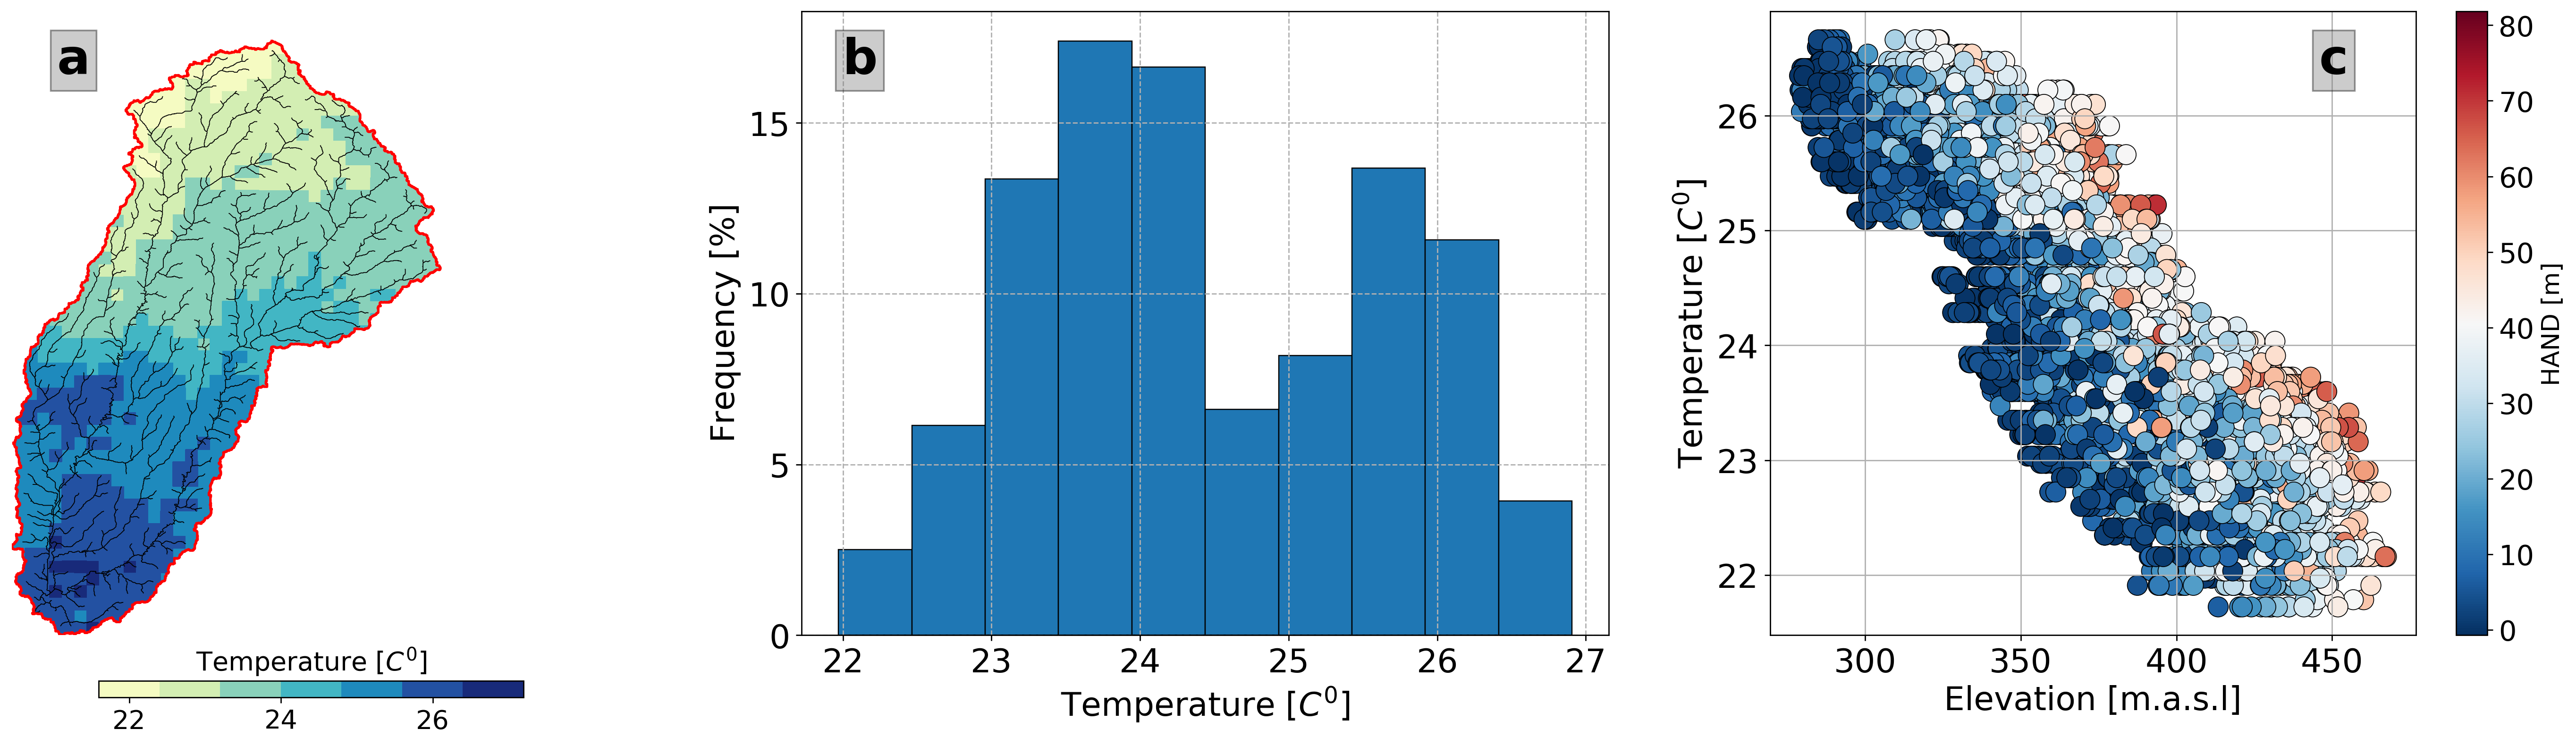

In [85]:
#Plot
fig = pl.figure(figsize=(30,7), dpi = 250)
specs = gr.GridSpec(nrows=1, ncols=3, wspace=0.2, width_ratios=[0.3,0.3,0.3])

proj = ccrs.PlateCarree()
ax = fig.add_subplot(specs[0], projection = proj)
ax1 = cu.plot_basin(temp,  ax = ax, fig = fig, 
                    cmap=pl.get_cmap('YlGnBu'),
                    cbar_loc=[0.2,0.05,0.12,0.02], 
                    cbar_ticks=[20,22,24,26,28],cbar_title='Temperature [$C^0$]',
                   shape_path='../Geomorphology_example/temp_net.shp', shape_color='k')
ax.text(0.1,0.9, 'a', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))


ax = fig.add_subplot(specs[1])
h, b  = np.histogram(temp)
h = 100*(h.astype(float)/h.sum())
ax.bar(b[1:], h, b[1]-b[0], edgecolor = 'k',lw = 0.7)
ax.grid(ls = '--')
ax.tick_params(labelsize = 20)
yt = ax.set_yticks([0,5,10,15])
ax.set_xticks([22,23,24,25,26,27])
ax.text(0.05,0.9, 'b', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))
ax.set_xlabel('Temperature [$C^0$]', size = 20)
ax.set_ylabel('Frequency [$\%$]', size = 20)

ax = fig.add_subplot(specs[2])
p = np.random.choice(cu.ncells-1, 10000)
pl.scatter(cu.CellHeight[p], temp[p], s = 150,c = cu.CellHAND[p], cmap='RdBu_r', edgecolor = 'k', lw = 0.5)
cbar = pl.colorbar()
cbar.ax.tick_params(labelsize = 17)
ax.tick_params(labelsize = 20)
cbar.ax.set_ylabel('HAND [m]', size = 15)
pl.grid()
ax.set_xlabel('Elevation [m.a.s.l]', size = 20)
ax.set_ylabel('Temperature [$C^0$]', size = 20)
ax.text(0.85,0.9, 'c', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))
pl.savefig('temperature_analysis.png', bbox_inches = 'tight')

In [89]:
cu.hills

array([[  5892,   5895,   7934, ..., 812459, 812460, 812476],
       [   806,    806,    804, ...,      1,      1,      0]], dtype=int32)